# 05. forecast(시계열 분석)

## 1. 배경 및 설치

- fbprophet 관련 링크
    - https://facebook.github.io/prophet/

- install 진행
    - 윈도우 유저는 Visual C++ Build Tool을 먼저 설치해주세요(아래 윈도우 기준 설치 내용에 있는 링크 클릭하면 됨)
    - https://go.microsoft.com/fwlink/?LinkId=691126
    - conda install pandas-datareader   (공통사항)
    - conda install -c conda-forge fbprophet  (윈도우, 맥(인텔))
    - pip install fbprophet  (맥(m1))

### 윈도우 기준 설치
1. Visual C++ Build Tool
    - https://visualstudio.microsoft.com/visual-cpp-build-tools/
    - 위 링크 이동 후, "Build Tools 다운로드" 클릭
2. conda install pandas-datareader
3. conda install -c conda-forge fbprophet

In [2]:
from pandas_datareader import data
from fbprophet import Prophet

---

## 함수(def)의 기초

In [2]:
def test_def(a, b):
    return a + b

In [3]:
c = test_def(2, 3)
c

5

In [4]:
3 + c

8

- 가장 기초적인 모양의 def 정의 
- 이름(test_df)과 입력 인자(a, b)를 정해준다 
- 출력(return)을 작성

In [5]:
# 전역변수(global)
a = 1 

def edit_a(i):
    # 지역변수(local)
    global a 
    a = i

In [6]:
edit_a(2)
a

2

- global 변수를 def 내에서 사용하고 싶다면 global로 선언

In [7]:
def edit_a(i):
    a = i 

In [8]:
edit_a(5)
print(a)

2


- def 내에서의 변수와 밖에서의 변수는 같은 이름이어도 같은 것이 아니다

$$ y = asin(2\pi ft + t_0) + b $$

In [3]:
import matplotlib.pyplot as plt 
import numpy as np 
%matplotlib inline 

In [11]:
def plotSinWave(amp, freq, endTime, sampleTime, startTime, bias):
    """
    plot sine wave 
    y = a sin(2 pi f t + t_0) + b
    """
    time = np.arange(startTime, endTime, sampleTime)
    result = amp * np.sin(2 * np.pi * freq * time + startTime) + bias 
    
    plt.figure(figsize=(12, 6))
    plt.plot(time, result)
    plt.grid(True)
    plt.xlabel("time")
    plt.ylabel("sin")
    plt.title(str(amp) + "*sin(2*pi" + str(freq) + "*t+" + str(startTime) + ")+" + str(bias))
    plt.show()

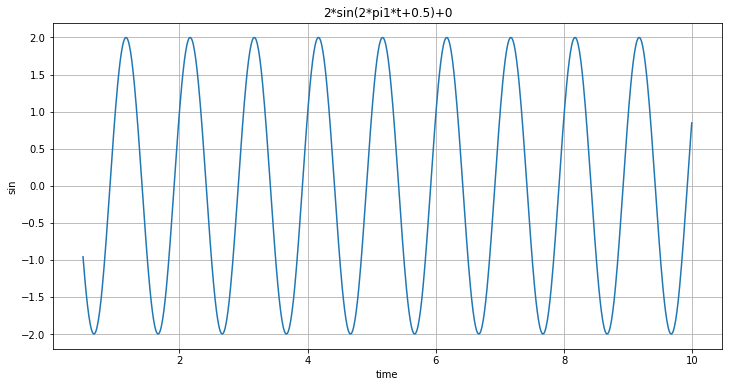

In [12]:
plotSinWave(2, 1, 10, 0.01, 0.5, 0)

In [13]:
def plotSinWave(**kwargs):
    """
    plot sine wave 
    y = a sin(2 pi f t + t_0) + b
    """
    endTime = kwargs.get("endTime", 1)
    sampleTime = kwargs.get("sampleTime", 0.01)
    amp = kwargs.get("amp", 1)
    freq = kwargs.get("freq", 1)
    startTime = kwargs.get("startTime", 0)
    bias = kwargs.get("bias", 0)
    figsize = kwargs.get("figsize", (12, 6))
    
    time = np.arange(startTime, endTime, sampleTime)
    result = amp * np.sin(2 * np.pi * freq * time + startTime) + bias 
    
    plt.figure(figsize=(12, 6))
    plt.plot(time, result)
    plt.grid(True)
    plt.xlabel("time")
    plt.ylabel("sin")
    plt.title(str(amp) + "*sin(2*pi" + str(freq) + "*t+" + str(startTime) + ")+" + str(bias))
    plt.show()

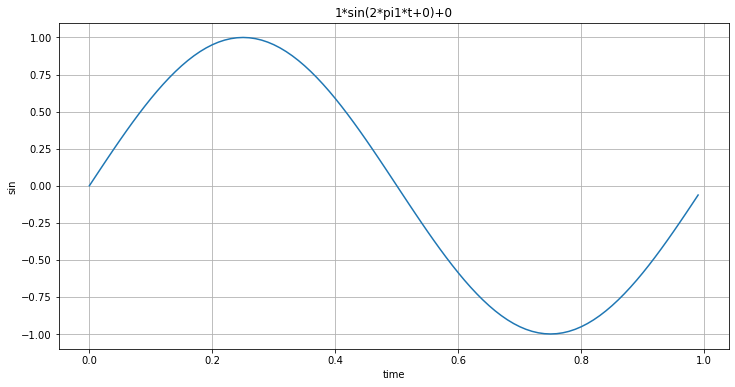

In [14]:
plotSinWave()

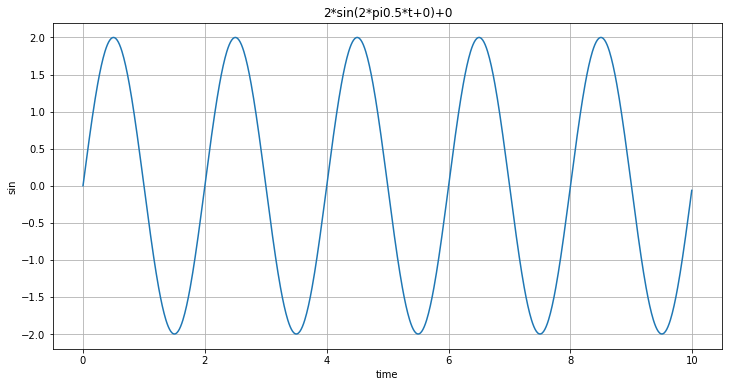

In [17]:
plotSinWave(amp=2, freq=0.5, endTime=10)

## 내가 만든 함수 import
- drawSinWave.py

In [18]:
%%writefile ./drawSinWave.py

import numpy as np 
import matplotlib.pyplot as plt 

def plotSinWave(**kwargs):
    """
    plot sine wave 
    y = a sin(2 pi f t + t_0) + b
    """
    endTime = kwargs.get("endTime", 1)
    sampleTime = kwargs.get("sampleTime", 0.01)
    amp = kwargs.get("amp", 1)
    freq = kwargs.get("freq", 1)
    startTime = kwargs.get("startTime", 0)
    bias = kwargs.get("bias", 0)
    figsize = kwargs.get("figsize", (12, 6))
    
    time = np.arange(startTime, endTime, sampleTime)
    result = amp * np.sin(2 * np.pi * freq * time + startTime) + bias 
    
    plt.figure(figsize=(12, 6))
    plt.plot(time, result)
    plt.grid(True)
    plt.xlabel("time")
    plt.ylabel("sin")
    plt.title(str(amp) + "*sin(2*pi" + str(freq) + "*t+" + str(startTime) + ")+" + str(bias))
    plt.show()
    
if __name__ == "__main__":
    print("hello world~!!")
    print("this is test graph!!")
    plotSinWave(amp=1, endTime=2)

Writing ./drawSinWave.py


In [19]:
import drawSinWave as dS

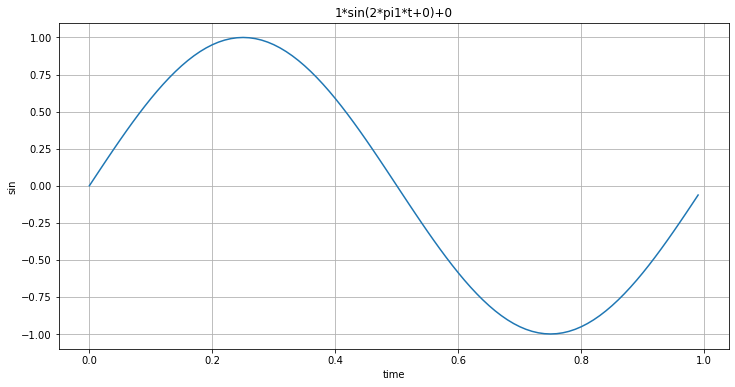

In [20]:
dS.plotSinWave()

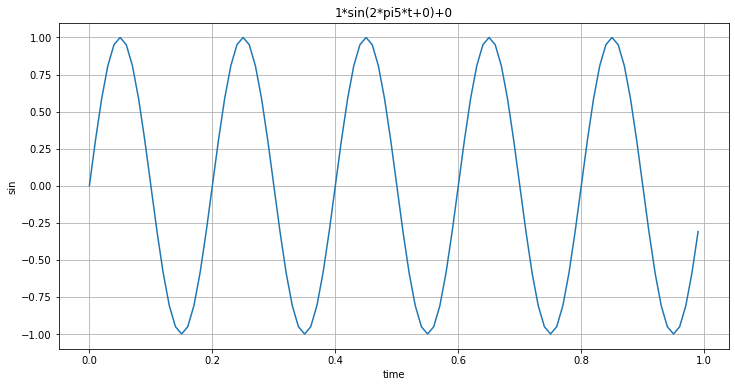

In [21]:
dS.plotSinWave(freq=5)

## 그래프 한글 설정

In [22]:
%%writefile ./set_matplotlib_hangul.py

import platform
import matplotlib.pyplot as plt 
from matplotlib import font_manager, rc

path = "c:/Windows/Fonts/malgun.ttf"

if platform.system() == "Darwin":
    print("Hangul OK in your MAC!!!")
    rc("font", family="Arial Unicode MS")
elif platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    print("Hangul OK in your Windows!!!")
    rc("font", family=font_name)
else:
    print("Unknown system")
    
plt.rcParams["axes.unicode_minus"] = False 

Writing ./set_matplotlib_hangul.py


In [23]:
import set_matplotlib_hangul

Hangul OK in your Windows!!!


Text(0.5, 1.0, '한글 테스트')

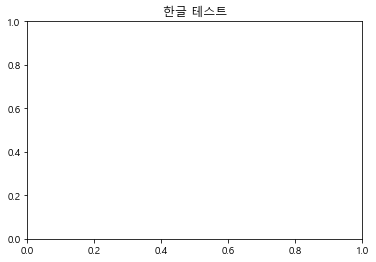

In [24]:
plt.title("한글 테스트")

---

## 2. Fbprophet 기초

In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

#### 1

In [2]:
time = np.linspace(0, 1, 365*2)
result = np.sin(2*np.pi*12*time)
ds = pd.date_range("2019-01-01", periods=365*2, freq="D")
df = pd.DataFrame({"ds": ds, "y": result})
df.head()

,ds,y
0,2019-01-01,0.000000
1,2019-01-02,0.103243
2,2019-01-03,0.205382
3,2019-01-04,0.305326
4,2019-01-05,0.402007


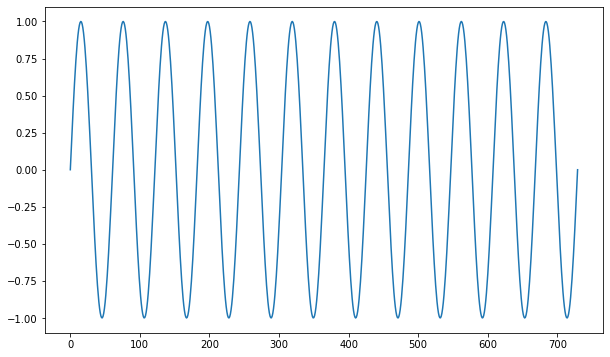

In [3]:
df["y"].plot(figsize=(10, 6));

In [5]:
from fbprophet import Prophet

In [5]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)

In [6]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

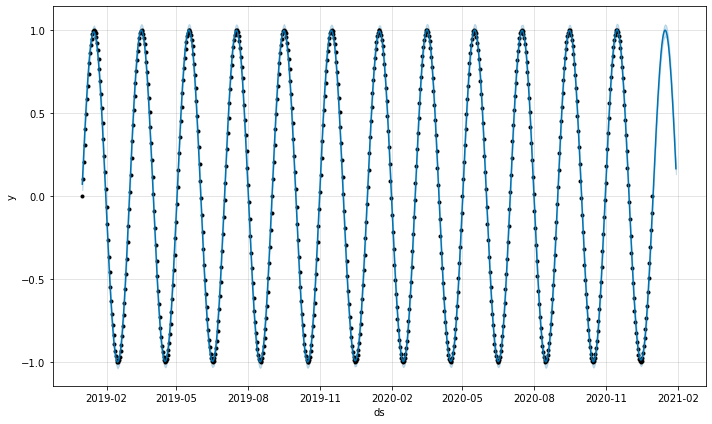

In [8]:
m.plot(forecast);

#### 2

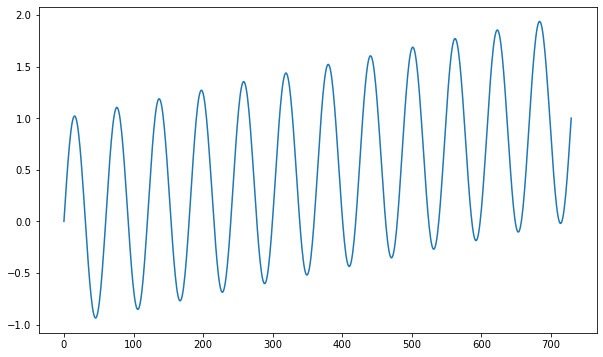

In [9]:
time = np.linspace(0, 1, 365*2)
result = np.sin(2*np.pi*12*time) + time

ds = pd.date_range("2019-01-01", periods=365*2, freq="D")
df = pd.DataFrame({"ds": ds, "y": result})

df["y"].plot(figsize=(10, 6));

In [10]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

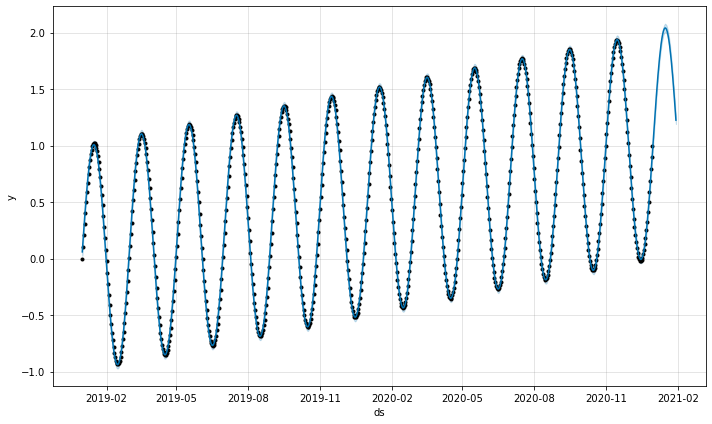

In [13]:
m.plot(forecast);

#### 3

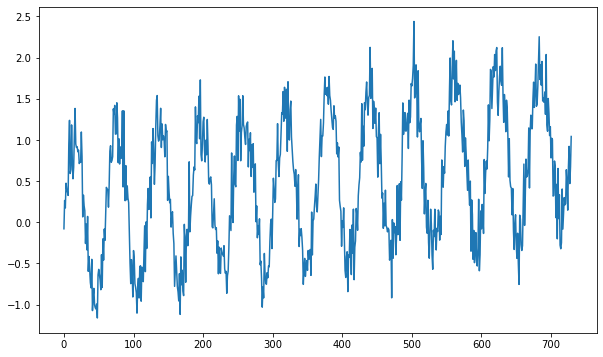

In [32]:
time = np.linspace(0, 1, 365*2)
result = np.sin(2*np.pi*12*time) + time + np.random.randn(365*2)/4

ds = pd.date_range("2019-01-01", periods=365*2, freq="D")
df = pd.DataFrame({"ds": ds, "y": result})

df["y"].plot(figsize=(10, 6));

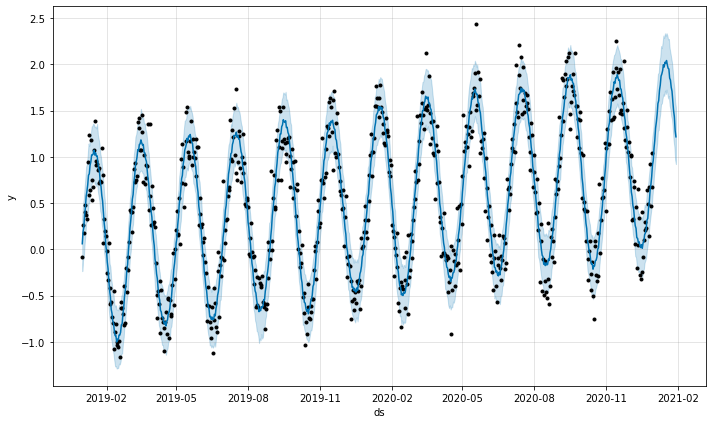

In [33]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
m.plot(forecast);

## 3. 시계열 데이터 실전 이용해보기
- https://pinkwink.kr/

In [6]:
import pandas as pd 
import pandas_datareader as web 
import numpy as np
import matplotlib.pyplot as plt

from fbprophet import Prophet
from datetime import datetime

%matplotlib inline

In [4]:
pinkwink_web = pd.read_csv(
    "../data/05_PinkWink_Web_Traffic.csv",
    encoding="utf-8",
    thousands=",",
    names=["date", "hit"],
    index_col=0
)

pinkwink_web.head()

,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0


In [5]:
pinkwink_web.info()  # null인 값이 1개 있음

<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 16. 7. 1. to nan
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   hit     365 non-null    float64
dtypes: float64(1)
memory usage: 5.7+ KB


In [8]:
pinkwink_web["hit"].notnull()  # null인 값이 1개 있음

date
16. 7. 1.      True
16. 7. 2.      True
16. 7. 3.      True
16. 7. 4.      True
16. 7. 5.      True
              ...  
17. 6. 27.     True
17. 6. 28.     True
17. 6. 29.     True
17. 6. 30.     True
NaN           False
Name: hit, Length: 366, dtype: bool

In [9]:
pinkwink_web = pinkwink_web[pinkwink_web["hit"].notnull()]
pinkwink_web.head()

,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0


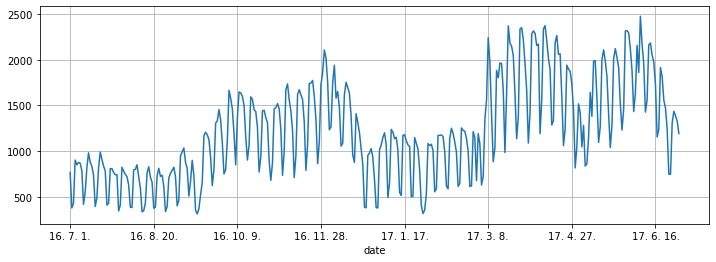

In [10]:
# 전체 데이터 그려보기 
pinkwink_web["hit"].plot(figsize=(12, 4), grid=True);

In [14]:
# trend 분석을 시각화하기 위한 x축 값을 만들기 
time = np.arange(0, len(pinkwink_web))
traffic = pinkwink_web["hit"].values
fx = np.linspace(0, time[-1], 1000)  # 1천개의 등간격 데이터 생성

In [15]:
# 에러를 계산할 함수
def error(f, x, y):
    return np.sqrt(np.mean((f(x) - y) ** 2))

#### (참고) "list - list"는 에러가 발생하지만, "np.array - np.array"는 아래와 같이 정상 동작함(단, 아이템 개수가 같아야 함)

In [60]:
a = np.array([7, 10, 15])
b = np.array([2, 7, 9])

a - b

array([5, 3, 6])

In [61]:
(a - b) ** 2

array([25,  9, 36], dtype=int32)

In [62]:
np.mean((a - b) ** 2)

23.333333333333332

In [64]:
fp1 = np.polyfit(time, traffic, 1)
f1 = np.poly1d(fp1)

f2p = np.polyfit(time, traffic, 2)
f2 = np.poly1d(f2p)

f3p = np.polyfit(time, traffic, 3)
f3 = np.poly1d(f3p)

f15p = np.polyfit(time, traffic, 15)
f15 = np.poly1d(f15p)

In [66]:
# 에러 계산 => RMSE 산출
print(error(f1, time, traffic))
print(error(f2, time, traffic))
print(error(f3, time, traffic))
print(error(f15, time, traffic))

430.85973081109626
430.62841018946943
429.5328046676293
330.4777304274343


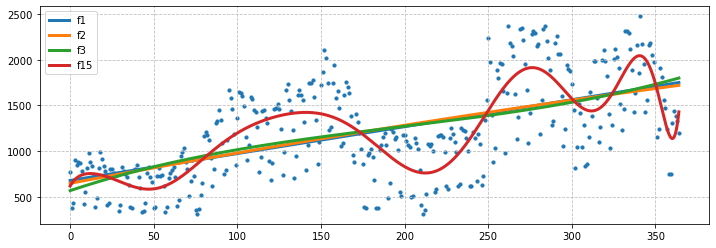

In [76]:
plt.figure(figsize=(12, 4))
plt.scatter(time, traffic, s=10)
plt.plot(fx, f1(fx), lw=3, label='f1')
plt.plot(fx, f2(fx), lw=3, label='f2')
plt.plot(fx, f3(fx), lw=3, label='f3')
plt.plot(fx, f15(fx), lw=3, label='f15')

plt.grid(True, linestyle="--", color="0.75")
plt.legend(loc=2)
plt.show()

In [89]:
df = pd.DataFrame({"ds": pinkwink_web.index, "y": pinkwink_web["hit"]})
df.reset_index(inplace=True)
df["ds"] = pd.to_datetime(df["ds"], format="%y. %m. %d.")
df

,date,ds,y
0,16. 7. 1.,2016-07-01,766.0
1,16. 7. 2.,2016-07-02,377.0
2,16. 7. 3.,2016-07-03,427.0
3,16. 7. 4.,2016-07-04,902.0
4,16. 7. 5.,2016-07-05,850.0
...,...,...,...
360,17. 6. 26.,2017-06-26,1309.0
361,17. 6. 27.,2017-06-27,1436.0
362,17. 6. 28.,2017-06-28,1387.0
363,17. 6. 29.,2017-06-29,1328.0


In [90]:
del df["date"]
df.head()

,ds,y
0,2016-07-01,766.0
1,2016-07-02,377.0
2,2016-07-03,427.0
3,2016-07-04,902.0
4,2016-07-05,850.0


#### Prophet()

In [29]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

In [30]:
# 60일에 해당하는 데이터 예측 
future = m.make_future_dataframe(periods=60)
future.tail()  # 기존 데이터프레임의 마지막 날짜인 6월30일 이후의 60일 날짜 데이터 생성됨

,ds
420,2017-08-25
421,2017-08-26
422,2017-08-27
423,2017-08-28
424,2017-08-29


In [33]:
# 예측 결과는 상한/하한의 범위를 포함해서 얻어진다 
forecast = m.predict(future)
forecast.tail()  # 그냥 출력하면 여러개의 컬럼이 출력됨

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
420,2017-08-25,1166.464680,691.025089,1105.293710,1166.449441,1166.479508,-269.888108,-269.888108,-269.888108,241.465995,...,-51.503692,-51.503692,-51.503692,-459.850411,-459.850411,-459.850411,0.0,0.0,0.0,896.576571
421,2017-08-26,1167.276383,272.168838,691.978205,1167.260742,1167.291629,-685.731971,-685.731971,-685.731971,241.465995,...,-467.504111,-467.504111,-467.504111,-459.693855,-459.693855,-459.693855,0.0,0.0,0.0,481.544412
422,2017-08-27,1168.088087,400.074355,827.653727,1168.072039,1168.103764,-553.876086,-553.876086,-553.876086,241.465995,...,-335.342351,-335.342351,-335.342351,-459.999730,-459.999730,-459.999730,0.0,0.0,0.0,614.212001
423,2017-08-28,1168.899790,954.263515,1362.579969,1168.883251,1168.915864,-1.933583,-1.933583,-1.933583,241.465995,...,217.283657,217.283657,217.283657,-460.683235,-460.683235,-460.683235,0.0,0.0,0.0,1166.966207
424,2017-08-29,1169.711494,1002.136219,1412.550295,1169.694326,1169.727957,33.288662,33.288662,33.288662,241.465995,...,253.456750,253.456750,253.456750,-461.634083,-461.634083,-461.634083,0.0,0.0,0.0,1203.000155


In [34]:
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()  # 확인하고자 하는 컬럼만 출력

,ds,yhat,yhat_lower,yhat_upper
420,2017-08-25,896.576571,691.025089,1105.293710
421,2017-08-26,481.544412,272.168838,691.978205
422,2017-08-27,614.212001,400.074355,827.653727
423,2017-08-28,1166.966207,954.263515,1362.579969
424,2017-08-29,1203.000155,1002.136219,1412.550295


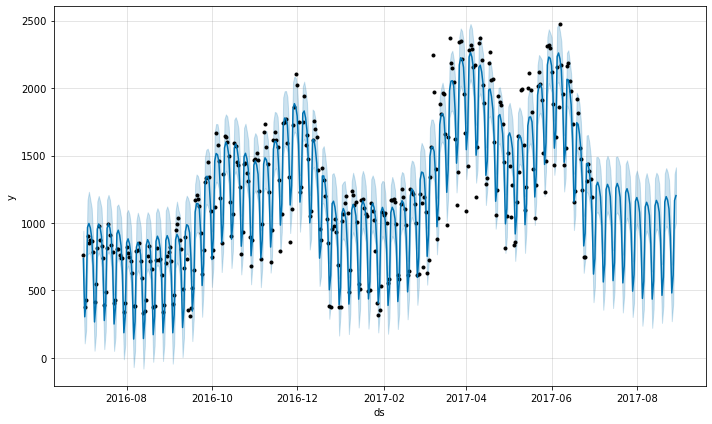

In [35]:
m.plot(forecast);

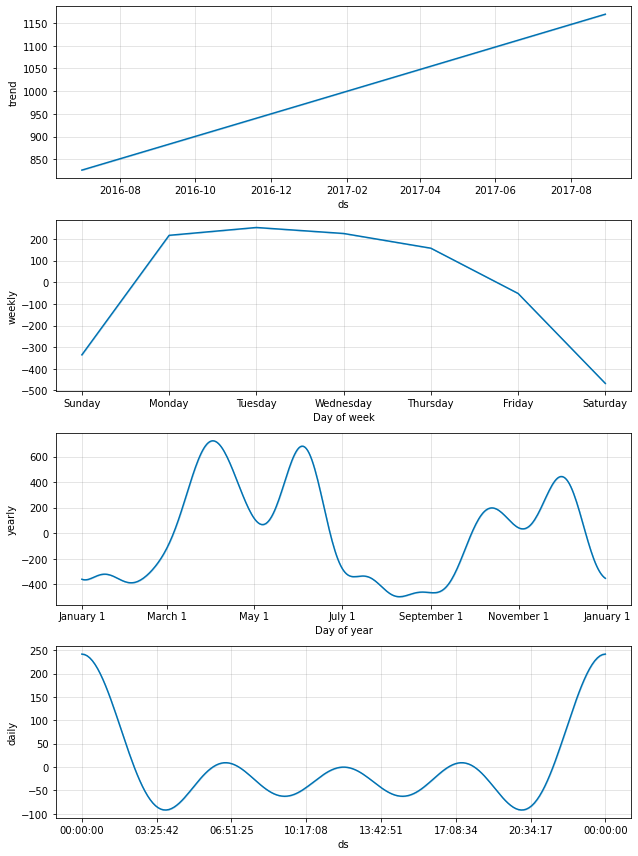

In [36]:
m.plot_components(forecast);  # 각 주제별 및 기간별 그래프를 각각 출력해 줌

## 4. 주식 데이터 fbprophet 으로 분석하기

#### 1. yahoo finance 
- https://finance.yahoo.com/quote/035420.KS/history?p=035420.KS&guccounter=1

In [91]:
from bs4 import BeautifulSoup
from urllib.request import urlopen, Request

url = "https://finance.yahoo.com/quote/035420.KS/history?p=035420.KS&guccounter=1"
req = Request(url, headers={"User-Agent": "Chrome"})
page = urlopen(req).read()
soup = BeautifulSoup(page, "html.parser")
table = soup.find("table")
df_raw = pd.read_html(str(table))[0]  # 테이블 형태로 가져오기 위한 셋팅임
df_raw.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Oct 08, 2021",397500.00,397500.00,388000.00,388500.00,388500.00,542514
1,"Oct 07, 2021",380500.00,394000.00,378000.00,393500.00,393500.00,832068
2,"Oct 06, 2021",373000.00,383500.00,371500.00,373000.00,373000.00,826716
3,"Oct 05, 2021",378500.00,380000.00,370000.00,370500.00,370500.00,828794
4,"Oct 01, 2021",388500.00,389500.00,381500.00,382000.00,382000.00,402239


In [92]:
df_raw.tail()

,Date,Open,High,Low,Close*,Adj Close**,Volume
96,"May 20, 2021",351500.00,355000.00,348500.00,351000.00,351000.00,561151
97,"May 18, 2021",347000.00,349500.00,345000.00,349500.00,349500.00,445015
98,"May 17, 2021",345500.00,349000.00,341000.00,344000.00,344000.00,453316
99,"May 14, 2021",338000.00,344500.00,337500.00,342500.00,342500.00,460390
100,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...


In [93]:
# fbprophet을 사용하는 형식에 맞춰준 뒤, 맨 마지막 NaN 값이 있어서 제외 
df_tmp = pd.DataFrame({"ds": df_raw["Date"], "y": df_raw["Close*"]})
df_target = df_tmp[:-1]
df_target.head()

,ds,y
0,"Oct 08, 2021",388500.00
1,"Oct 07, 2021",393500.00
2,"Oct 06, 2021",373000.00
3,"Oct 05, 2021",370500.00
4,"Oct 01, 2021",382000.00


In [94]:
# hardcopy 후, 날짜를 fbprophet이 요구하는 형태로 변형
df = df_target.copy()
df["ds"] = pd.to_datetime(df_target["ds"], format="%b %d, %Y")
df.head()

,ds,y
0,2021-10-08,388500.00
1,2021-10-07,393500.00
2,2021-10-06,373000.00
3,2021-10-05,370500.00
4,2021-10-01,382000.00


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      100 non-null    datetime64[ns]
 1   y       100 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 1.7+ KB


In [96]:
# 데이터형 변환 object => float 

df["y"] = df["y"].astype("float")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      100 non-null    datetime64[ns]
 1   y       100 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.7 KB


In [105]:
# Prophet()

In [97]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

In [98]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
125,2021-11-03,435819.774712,424708.037489,446645.637843
126,2021-11-04,440183.547603,429353.558314,451404.968184
127,2021-11-05,443571.834845,432447.892807,454445.438111
128,2021-11-06,441912.178215,430225.083802,452300.548356
129,2021-11-07,444030.247793,433289.956589,455222.639922


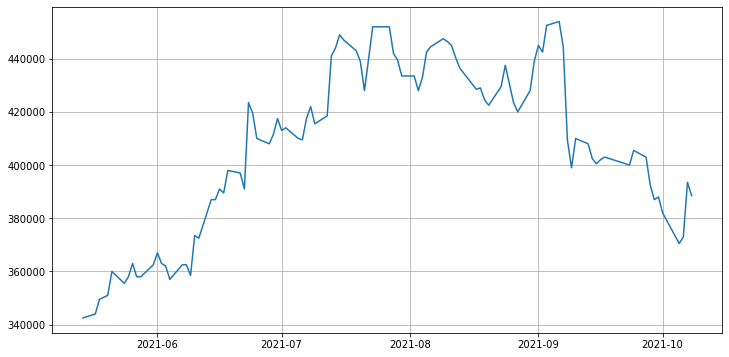

In [99]:
# 우선 df 기준 그래프 출력
plt.figure(figsize=(12, 6))
plt.plot(df["ds"], df["y"], label="real")
plt.grid(True)
plt.show()

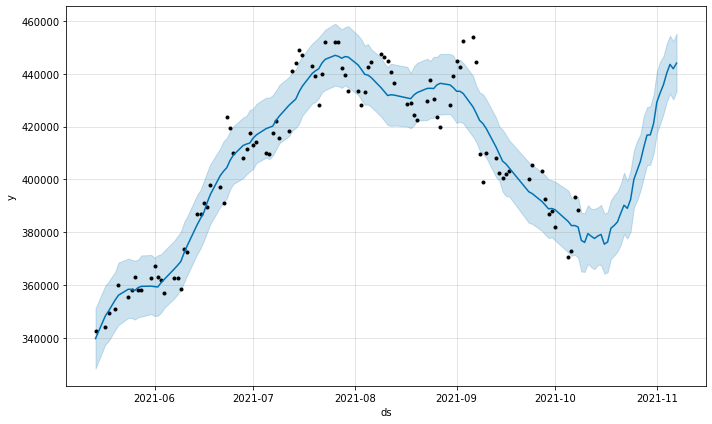

In [102]:
m.plot(forecast);  # 예측된 그래프 출력

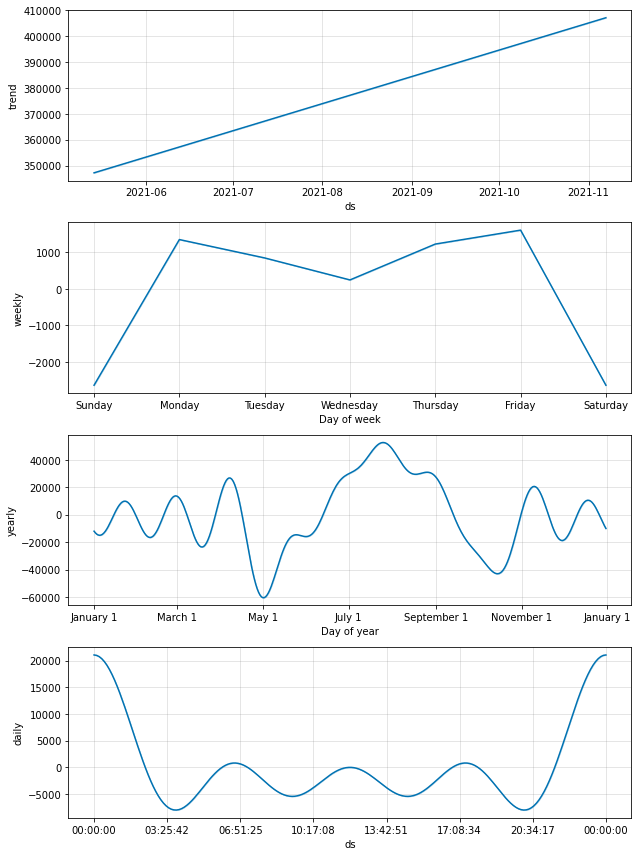

In [103]:
m.plot_components(forecast);

#### 2. KIA 

In [106]:
!pip install yfinance  # yfinance 모듈 설치 진행

  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23908 sha256=a96874af7798a38ecccab1c6fd0e80f98544fcfc2a0b88e2a105d5ee29cc9bc5
  Stored in directory: c:\users\hj\appdata\local\pip\cache\wheels\ec\cc\c1\32da8ee853d742d5d7cbd11ee04421222eb354672020b57297
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8367 sha256=5f7437a890cbcabef87aace575acbb114064d31e259516d9bbf2c4e7c0ca0601
  Stored in directory: c:\users\hj\appdata\local\pip\cache\wheels\57\6d\a3\a39b839cc75274d2acfb1c58bfead2f726c6577fe8c4723f13
Successfully built yfinance multitasking


In [107]:
# 기아 자동차의 종목코드를 가지고 기간을 입력한다
import yfinance as yf
from pandas_datareader import data 

yf.pdr_override()  # yfinance 내의 함수를 실행하고 아래 코드 실행

start_date = "2010-03-01"
end_date = "2018-02-28"
KIA = data.get_data_yahoo("000270.KS", start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [108]:
KIA.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-03-02,22050.0,22300.0,21800.0,21850.0,17800.662109,3935516
2010-03-03,22100.0,22450.0,21850.0,22400.0,18248.734375,4380617
2010-03-04,22400.0,22600.0,22300.0,22500.0,18330.203125,2490087
2010-03-05,22500.0,22750.0,22350.0,22750.0,18533.867188,2379282
2010-03-08,23050.0,23100.0,22500.0,22800.0,18574.603516,4326618


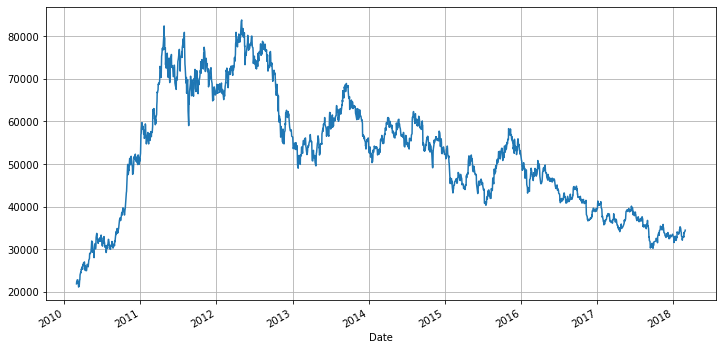

In [111]:
KIA["Close"].plot(figsize=(12, 6), grid=True);

In [113]:
# accuracy(정확도) 확인을 위한 데이터 분류
KIA_trunc = KIA[:"2017-11-30"]
KIA_trunc.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-24,33150.0,33400.0,32800.0,33050.0,30097.224609,773316
2017-11-27,32800.0,33050.0,32450.0,32750.0,29824.029297,1318245
2017-11-28,32650.0,33450.0,32450.0,32950.0,30006.162109,1350643
2017-11-29,33000.0,33500.0,32700.0,33350.0,30370.423828,884282
2017-11-30,33700.0,34250.0,33500.0,33650.0,30643.621094,2048876


In [114]:
# forecast를 위한 준비 
df = pd.DataFrame({"ds": KIA_trunc.index, "y":KIA_trunc["Close"]})
df.reset_index(inplace=True)
del df["Date"]
df.head()

,ds,y
0,2010-03-02,21850.0
1,2010-03-03,22400.0
2,2010-03-04,22500.0
3,2010-03-05,22750.0
4,2010-03-08,22800.0


In [115]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

In [116]:
future = m.make_future_dataframe(periods=90)
forecast = m.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
2001,2018-02-24,26879.820301,22801.165586,31338.813468
2002,2018-02-25,26962.113329,22831.331638,31089.852910
2003,2018-02-26,27189.323268,23114.822308,31357.792679
2004,2018-02-27,27353.074108,23070.441621,31418.314372
2005,2018-02-28,27398.864477,23313.454113,31758.066616


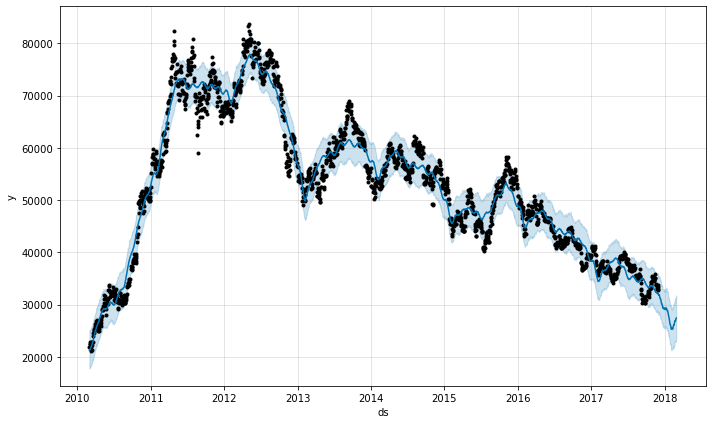

In [117]:
m.plot(forecast);

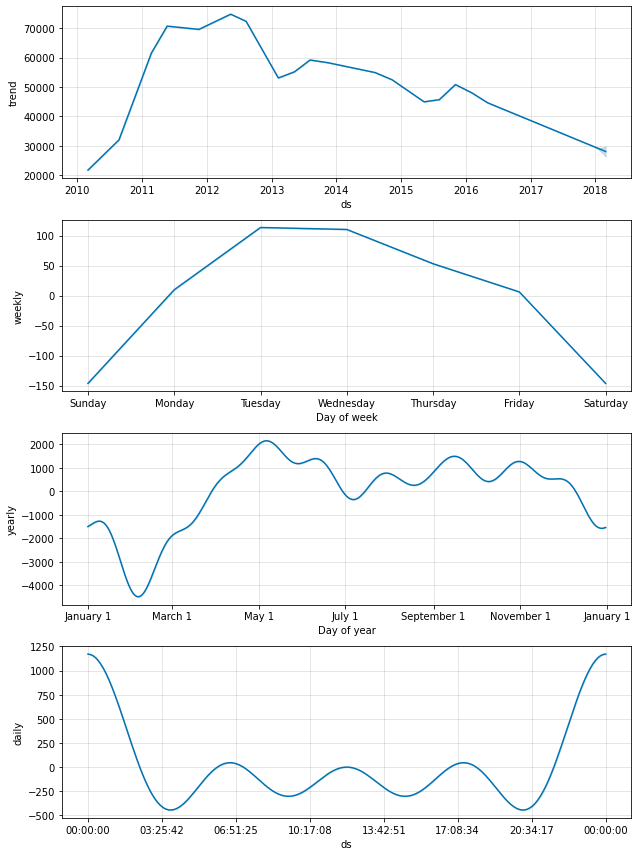

In [118]:
m.plot_components(forecast);

In [119]:
KIA["Close"]

Date
2010-03-02    21850.0
2010-03-03    22400.0
2010-03-04    22500.0
2010-03-05    22750.0
2010-03-08    22800.0
               ...   
2018-02-21    33850.0
2018-02-22    33650.0
2018-02-23    34000.0
2018-02-26    34200.0
2018-02-27    34450.0
Name: Close, Length: 1972, dtype: float64

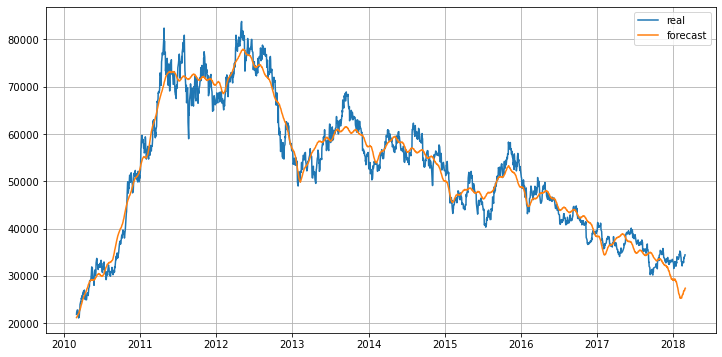

In [120]:
plt.figure(figsize=(12, 6))
plt.plot(KIA.index, KIA["Close"], label="real")
plt.plot(forecast["ds"], forecast["yhat"], label="forecast")
plt.grid(True)
plt.legend()
plt.show()

#### 3. 대한항공

In [7]:
# 003490 대한항공 

start_date = "2010-03-01"
end_date = "2018-02-28"
KoreaAir = data.get_data_yahoo("003490.KS", start_date, end_date)
KoreaAir.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-02-22,35450.0,34800.0,35050.0,35000.0,260174.0,34819.800781
2018-02-23,35400.0,34550.0,35200.0,35150.0,321125.0,34969.027344
2018-02-26,35550.0,33600.0,35300.0,33900.0,932870.0,33725.460938
2018-02-27,34300.0,33650.0,33900.0,33900.0,527398.0,33725.460938
2018-02-28,33750.0,32650.0,33650.0,32650.0,830726.0,32481.898438


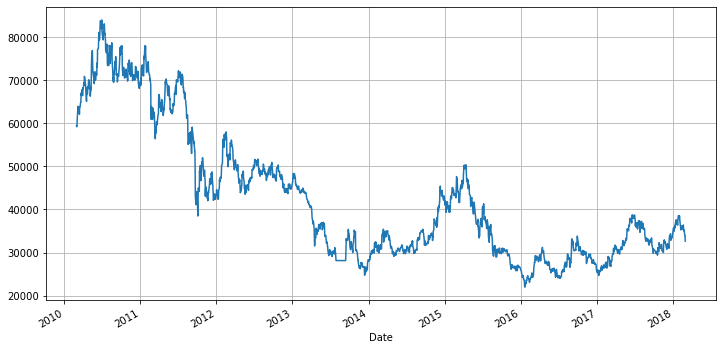

In [8]:
KoreaAir["Close"].plot(figsize=(12, 6), grid=True);

In [9]:
# accuracy 데이터 분리 
KoreaAir_trunc = KoreaAir[:"2017-11-30"]
KoreaAir_trunc.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-11-24,33250.0,32300.0,32900.0,32500.0,530941.0,32168.935547
2017-11-27,32800.0,31800.0,32600.0,31850.0,472095.0,31525.556641
2017-11-28,32500.0,31550.0,32050.0,31600.0,708754.0,31278.103516
2017-11-29,32250.0,31050.0,31850.0,31300.0,850385.0,30981.160156
2017-11-30,32050.0,31350.0,31800.0,31350.0,682573.0,31030.650391


In [10]:
# forecast를 위한 준비 
df = pd.DataFrame({"ds": KoreaAir_trunc.index, "y": KoreaAir_trunc["Close"]})
df.reset_index(inplace=True)
del df["Date"]
df.head()

,ds,y
0,2010-03-02,59390.417969
1,2010-03-03,59190.785156
2,2010-03-04,59290.601562
3,2010-03-05,60588.207031
4,2010-03-08,62784.152344


In [11]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)

In [12]:
future = m.make_future_dataframe(periods=90)
forecast = m.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
2001,2018-02-24,34800.595062,30449.720806,38780.461748
2002,2018-02-25,34706.298596,30623.486752,39332.317977
2003,2018-02-26,35661.530489,31206.854527,39806.065461
2004,2018-02-27,35505.006377,31135.677489,40142.396497
2005,2018-02-28,35425.820547,31373.801281,39736.275508


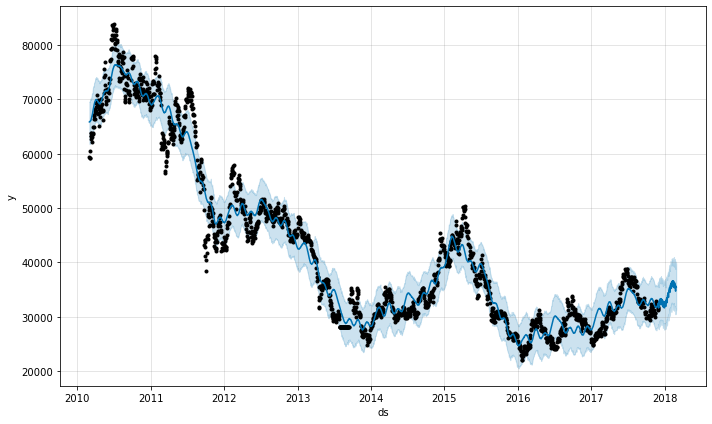

In [13]:
m.plot(forecast);

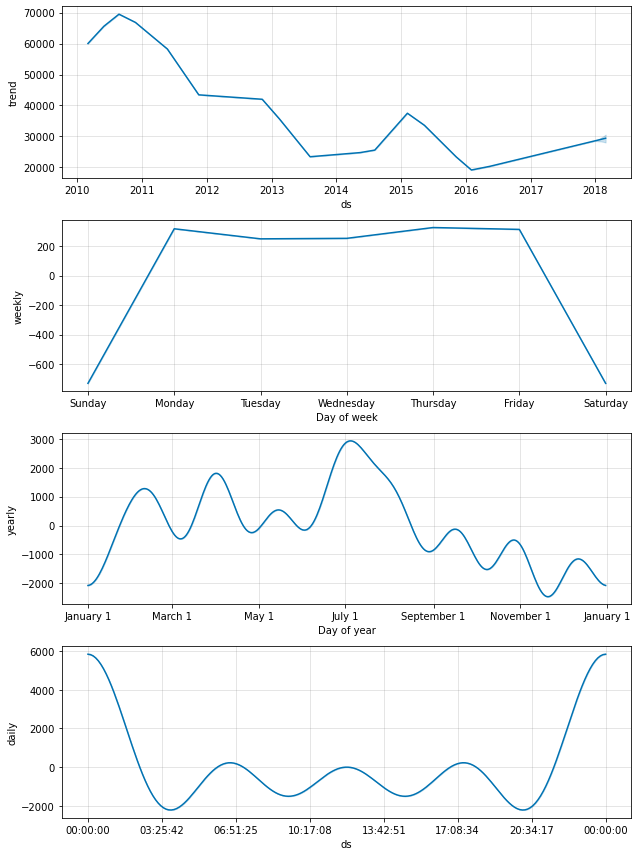

In [14]:
m.plot_components(forecast);

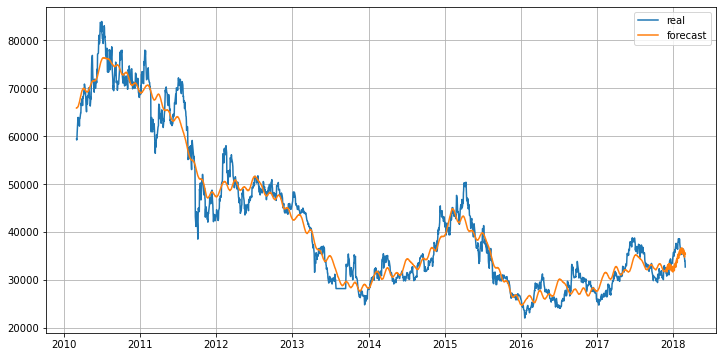

In [15]:
# 실제와 예측값 비교 그래프 
plt.figure(figsize=(12, 6))
plt.plot(KoreaAir.index, KoreaAir["Close"], label="real")
plt.plot(forecast["ds"], forecast["yhat"], label="forecast")
plt.grid(True)
plt.legend()
plt.show()

#### 4. 조금 특이한 형태의 데이터에 대한 forecast 

In [23]:
# Logistic 성장형 그래프를 가진 데이터에 대한 forecast 
df = pd.read_csv("../data/05_example_wp_R2.csv", index_col=0)
df.head()

,ds,y
0,2008-01-30,5.976351
1,2008-01-16,6.049733
2,2008-01-17,6.011267
3,2008-01-14,5.953243
4,2008-01-15,5.910797


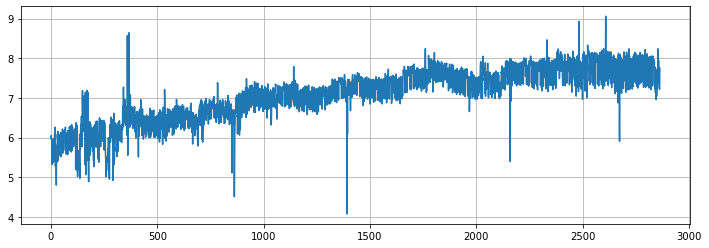

In [24]:
df["y"].plot(figsize=(12, 4), grid=True);

In [25]:
df.tail()

,ds,y
2858,2015-12-11,7.834788
2859,2015-12-12,7.360104
2860,2015-12-13,7.479864
2861,2015-12-18,7.765145
2862,2015-12-19,7.220374


In [26]:
# "logistic growth" 적용 시에는 "cap"컬럼을 추가해주어야 함 => 없을 경우 아래와 같이 에러메시지 출력됨

m = Prophet(growth="logistic", daily_seasonality=True)
m.fit(df);

ValueError: Capacities must be supplied for logistic growth in column "cap"

In [27]:
# "cap"컬럼 추가

df["cap"] = 8.5
df.tail()

,ds,y,cap
2858,2015-12-11,7.834788,8.5
2859,2015-12-12,7.360104,8.5
2860,2015-12-13,7.479864,8.5
2861,2015-12-18,7.765145,8.5
2862,2015-12-19,7.220374,8.5


In [28]:
m = Prophet(growth="logistic", daily_seasonality=True)
m.fit(df);

In [31]:
future = m.make_future_dataframe(periods=1826)
future["cap"] = 8.5  # future 데이터프레임에도 "cap"컬럼을 추가하지 않으면 에러메시지 출력됨
future.head()

,ds,cap
0,2008-01-01,8.5
1,2008-01-02,8.5
2,2008-01-03,8.5
3,2008-01-04,8.5
4,2008-01-05,8.5


In [33]:
future.tail()

,ds,cap
4684,2020-12-26,8.5
4685,2020-12-27,8.5
4686,2020-12-28,8.5
4687,2020-12-29,8.5
4688,2020-12-30,8.5


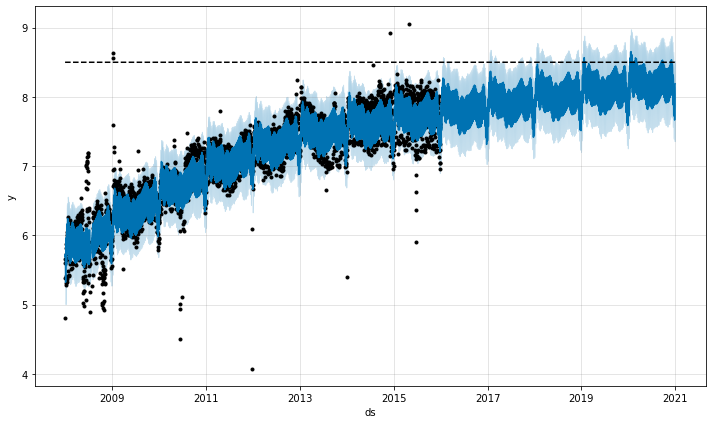

In [32]:
forecast = m.predict(future)
m.plot(forecast);

## 5. 비트코인 데이터 fbprophet으로 분석하기
- https://bitcoincharts.com/charts/bitstampUSD#rg60ztgSzm1g10zm2g25zv

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import time

from selenium import webdriver
from selenium.webdriver.common.action_chains import ActionChains
from bs4 import BeautifulSoup
from fbprophet import Prophet

%matplotlib inline

In [3]:
url = "https://bitcoincharts.com/charts/bitstampUSD#rg730ztgSzm1g10zm2g25zv"  # 730일 기간의 데이터를 조회한 페이지
driver = webdriver.Chrome("../driver/chromedriver.exe")
driver.get(url)

In [4]:
# 스크롤 
xpath = '//*[@id="content_chart"]/div/div[2]/a'
variable = driver.find_element_by_xpath(xpath)
driver.execute_script("return arguments[0].scrollIntoView();", variable)
variable.click()

In [5]:
html = driver.page_source
soup = BeautifulSoup(html, "html.parser")
table = soup.find("table", "data")
table

<table class="data" id="chart_table" style="display: table;">
<thead>
<tr>
<th>Timestamp</th><th>Open</th><th>High</th><th>Low</th><th>Close</th><th>Volume (BTC)</th><th>Volume (Currency)</th><th>Weighted Price</th>
</tr>
</thead>
<tbody>
<tr><td>2019-10-14 00:00:00</td><td>8278.39</td><td>8416.67</td><td>8215.41</td><td>8362.99</td><td>4294.61</td><td>35705415.19</td><td>8314.01</td></tr><tr><td>2019-10-15 00:00:00</td><td>8353.33</td><td>8420.85</td><td>8086</td><td>8155.13</td><td>5044.66</td><td>41647353.51</td><td>8255.73</td></tr><tr><td>2019-10-16 00:00:00</td><td>8162.45</td><td>8179.1</td><td>7912.66</td><td>7995.89</td><td>8644.4</td><td>69316753.57</td><td>8018.69</td></tr><tr><td>2019-10-17 00:00:00</td><td>7995.73</td><td>8130.71</td><td>7936.71</td><td>8073.32</td><td>5395.89</td><td>43466038.76</td><td>8055.4</td></tr><tr><td>2019-10-18 00:00:00</td><td>8069.26</td><td>8120.77</td><td>7811.62</td><td>7955.08</td><td>5611.09</td><td>44500999.58</td><td>7930.9</td></tr><tr

In [6]:
driver.quit()

In [10]:
df = pd.read_html(str(table))  # 해당 테이블 읽어오기
df  # 리스트 형태로 반환된 것을 확인 가능

[               Timestamp      Open      High       Low     Close  \
 0    2019-10-14 00:00:00   8278.39   8416.67   8215.41   8362.99   
 1    2019-10-15 00:00:00   8353.33   8420.85   8086.00   8155.13   
 2    2019-10-16 00:00:00   8162.45   8179.10   7912.66   7995.89   
 3    2019-10-17 00:00:00   7995.73   8130.71   7936.71   8073.32   
 4    2019-10-18 00:00:00   8069.26   8120.77   7811.62   7955.08   
 ..                   ...       ...       ...       ...       ...   
 725  2021-10-08 00:00:00  53816.16  56168.00  53623.02  53957.21   
 726  2021-10-09 00:00:00  53952.82  55512.05  53674.69  54976.92   
 727  2021-10-10 00:00:00  54984.49  56561.00  51000.00  54714.95   
 728  2021-10-11 00:00:00  54657.00  57855.79  54462.45  57485.20   
 729  2021-10-12 00:00:00  57490.00  57701.00  56444.69  57418.52   
 
      Volume (BTC)  Volume (Currency)  Weighted Price  
 0         4294.61       3.570542e+07         8314.01  
 1         5044.66       4.164735e+07         8255.73  
 2

In [11]:
bitcoin = df[0]
bitcoin.head()

,Timestamp,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
0,2019-10-14 00:00:00,8278.39,8416.67,8215.41,8362.99,4294.61,35705415.19,8314.01
1,2019-10-15 00:00:00,8353.33,8420.85,8086.00,8155.13,5044.66,41647353.51,8255.73
2,2019-10-16 00:00:00,8162.45,8179.10,7912.66,7995.89,8644.40,69316753.57,8018.69
3,2019-10-17 00:00:00,7995.73,8130.71,7936.71,8073.32,5395.89,43466038.76,8055.40
4,2019-10-18 00:00:00,8069.26,8120.77,7811.62,7955.08,5611.09,44500999.58,7930.90


In [12]:
bitcoin.to_csv("../data/05_bitcoin_history.csv", sep=",")

In [13]:
bitcoin = pd.read_csv("../data/05_bitcoin_history.csv", index_col=0)
bitcoin.tail()

,Timestamp,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
725,2021-10-08 00:00:00,53816.16,56168.00,53623.02,53957.21,2217.76,1.213333e+08,54709.97
726,2021-10-09 00:00:00,53952.82,55512.05,53674.69,54976.92,1061.02,5.821879e+07,54870.42
727,2021-10-10 00:00:00,54984.49,56561.00,51000.00,54714.95,1735.42,9.565476e+07,55119.02
728,2021-10-11 00:00:00,54657.00,57855.79,54462.45,57485.20,1955.79,1.110931e+08,56802.29
729,2021-10-12 00:00:00,57490.00,57701.00,56444.69,57418.52,509.94,2.910380e+07,57072.76


In [15]:
bitcoin.info()  # Timestamp 컬럼 데이터타입이 object이지만 이후 과정에서 이상없이 진행됨 확인

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          730 non-null    object 
 1   Open               730 non-null    float64
 2   High               730 non-null    float64
 3   Low                730 non-null    float64
 4   Close              730 non-null    float64
 5   Volume (BTC)       730 non-null    float64
 6   Volume (Currency)  730 non-null    float64
 7   Weighted Price     730 non-null    float64
dtypes: float64(7), object(1)
memory usage: 51.3+ KB


In [14]:
# 분석하고 싶은 항목(Close)만 가지고, Prophet 적용 

df = pd.DataFrame({"ds": bitcoin["Timestamp"], "y": bitcoin["Close"]})
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

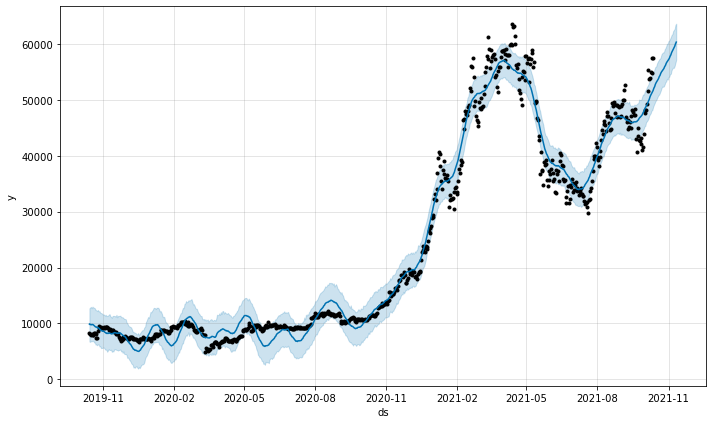

In [16]:
# 향후 30일간의 forecast
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
m.plot(forecast);

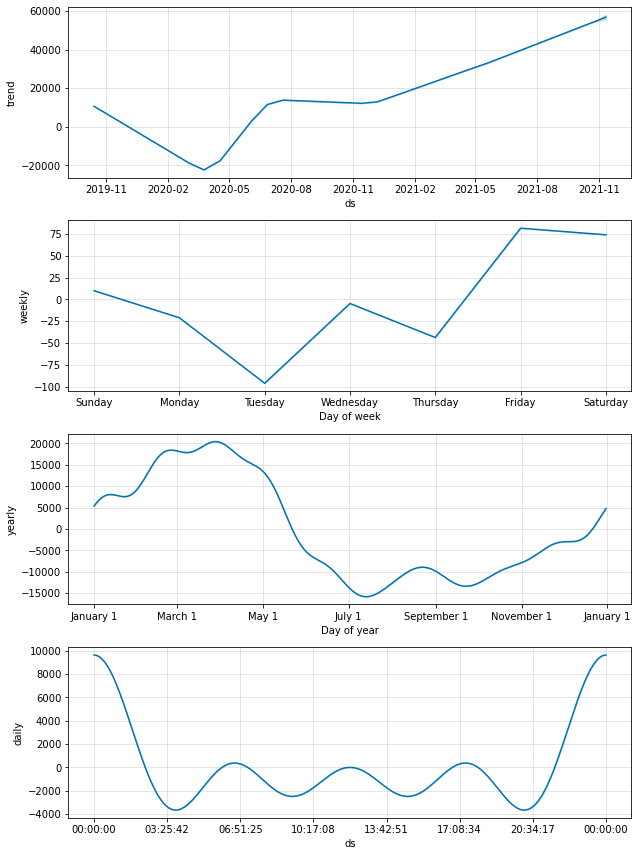

In [18]:
# 트렌드 
m.plot_components(forecast);